In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rcParams
from utils.utils import *

np.random.seed(2)

In [2]:
# Set device
print(f'The device used in this notebook is: {setDevice()}')

DEVICE = setDevice()

The device used in this notebook is: cuda


#### Import data

In [3]:
# Set settings
features, input_window, output_window, stride = set_settings()

print(f'features: {features}')
print(f'input_window: {input_window}')
print(f'output_window: {output_window}')
print(f'stride: {stride}')

features: ['Hips Flexion-Extension Left', 'Knees Flexion-Extension Left', 'Ankles Dorsiflexion-Plantarflexion Left', 'Hips Flexion-Extension Right', 'Knees Flexion-Extension Right', 'Ankles Dorsiflexion-Plantarflexion Right']
input_window: 100
output_window: 1
stride: 1


In [4]:
file_dir = r'D:\Study 2 Data\Healthy Gait\Train' 
# file_dir = r'D:\Study 2 Data\CP Gait\Train'
train_files = os.listdir(file_dir) 

# Changes the working directory to get the data from their location 
os.chdir(file_dir)
cwd = os.getcwd()

print(f'Current working directory is: {cwd}')
print(f"There are {len(train_files)} files in the specified path.")

Current working directory is: D:\Study 2 Data\Healthy Gait\Train
There are 7 files in the specified path.


In [5]:
train_files

['AB3154 BF T6-10.csv',
 'AB6751 BF T1-5.csv',
 'AB7422 BF T1-5.csv',
 'AB7779 BF T1-5.csv',
 'AB9119 BF T1-5.csv',
 'AB9737 BF T1-5.csv',
 'AB9737 BF T6-10.csv']

In [6]:

#Create feature list to extract values needed from CSV files
all_features = ['Trial', 'Time'] + features
all_features


['Trial',
 'Time',
 'Hips Flexion-Extension Left',
 'Knees Flexion-Extension Left',
 'Ankles Dorsiflexion-Plantarflexion Left',
 'Hips Flexion-Extension Right',
 'Knees Flexion-Extension Right',
 'Ankles Dorsiflexion-Plantarflexion Right']

In [7]:
all_data = create_dataframe(train_files, all_features)

Extracting data from: AB3154 BF T6-10.csv
Extracting data from: AB6751 BF T1-5.csv
Extracting data from: AB7422 BF T1-5.csv
Extracting data from: AB7779 BF T1-5.csv
Extracting data from: AB9119 BF T1-5.csv
Extracting data from: AB9737 BF T1-5.csv
Extracting data from: AB9737 BF T6-10.csv


In [8]:
all_data.reset_index(drop=True, inplace=True) #reset the index of the table
# path = r'D:\Study 2 Data\Healthy Gait' + '\\' + 'all_data_healthy_train.csv'
# all_data.to_csv(path)

In [9]:
all_data

,Patient ID,Trial,Time,Hips Flexion-Extension Left,Knees Flexion-Extension Left,Ankles Dorsiflexion-Plantarflexion Left,Hips Flexion-Extension Right,Knees Flexion-Extension Right,Ankles Dorsiflexion-Plantarflexion Right
0,AB3154 BF T6-10,1,161.00,-1.76414,0.42597,2.24148,-1.29770,4.85581,4.25152
1,AB3154 BF T6-10,1,161.01,-1.71541,0.43044,2.25861,-1.13917,4.97912,4.25320
2,AB3154 BF T6-10,1,161.02,-1.66432,0.43358,2.27493,-0.96327,5.11719,4.25485
3,AB3154 BF T6-10,1,161.03,-1.60888,0.43609,2.29088,-0.77092,5.26771,4.25494
4,AB3154 BF T6-10,1,161.04,-1.54643,0.43905,2.30714,-0.56356,5.42747,4.25163
...,...,...,...,...,...,...,...,...,...
69453,AB9737 BF T6-10,14,474.70,5.59699,13.43638,-0.19627,-10.90823,6.82313,14.37402
69454,AB9737 BF T6-10,14,474.71,5.45820,13.20250,-0.17039,-10.20259,7.80148,14.11679
69455,AB9737 BF T6-10,14,474.72,5.31928,12.95930,-0.15604,-9.44410,8.89409,13.85472
69456,AB9737 BF T6-10,14,474.73,5.17878,12.70795,-0.15333,-8.64847,10.08021,13.59274


In [10]:
n_trials = all_data['Trial'].max()
print(f'maximum number of trials is: {n_trials}')

maximum number of trials is: 16


In [11]:
all_data['Patient ID'].unique()

array(['AB3154 BF T6-10', 'AB6751 BF T1-5', 'AB7422 BF T1-5',
       'AB7779 BF T1-5', 'AB9119 BF T1-5', 'AB9737 BF T1-5',
       'AB9737 BF T6-10'], dtype=object)

In [12]:
# Healthy Subjects 
train_subjects = [
 'AB9737 BF T1-5', 
 'AB9737 BF T6-10', 
'AB3154 BF T6-10',
 'AB6751 BF T1-5', 
 'AB7779 BF T1-5', 
 'AB7422 BF T1-5']

val_subjects = ['AB9119 BF T1-5']


In [13]:
val_subjects

['AB9119 BF T1-5']

In [14]:
train_data = all_data.loc[all_data['Patient ID'].isin(train_subjects)]

val_data = all_data.loc[all_data['Patient ID'].isin(val_subjects)]

In [15]:
print(f'all_data: {all_data.shape}')
print(f'train_data: {train_data.shape}')
print(f'val_data: {val_data.shape}')

all_data: (69458, 9)
train_data: (61289, 9)
val_data: (8169, 9)


In [16]:
train_samples = count_nsamples(train_data)
val_samples = count_nsamples(val_data)

For patient: AB3154 BF T6-10, trial: 1, there are: 651 time-points
For patient: AB3154 BF T6-10, trial: 2, there are: 541 time-points
For patient: AB3154 BF T6-10, trial: 3, there are: 613 time-points
For patient: AB3154 BF T6-10, trial: 4, there are: 601 time-points
For patient: AB3154 BF T6-10, trial: 5, there are: 711 time-points
For patient: AB3154 BF T6-10, trial: 6, there are: 651 time-points
For patient: AB3154 BF T6-10, trial: 7, there are: 1031 time-points
For patient: AB3154 BF T6-10, trial: 8, there are: 896 time-points
For patient: AB3154 BF T6-10, trial: 9, there are: 812 time-points
For patient: AB6751 BF T1-5, trial: 1, there are: 761 time-points
For patient: AB6751 BF T1-5, trial: 2, there are: 733 time-points
For patient: AB6751 BF T1-5, trial: 3, there are: 731 time-points
For patient: AB6751 BF T1-5, trial: 4, there are: 682 time-points
For patient: AB6751 BF T1-5, trial: 5, there are: 710 time-points
For patient: AB6751 BF T1-5, trial: 6, there are: 708 time-points


In [17]:
print(f'Number of train samples: {train_samples}')
print(f'Number of validation samples: {val_samples}')

Number of train samples: 69
Number of validation samples: 10


In [18]:
m = all_data['Patient ID'].unique()

In [19]:

def pd_to_np_converter(data, n_samples, features):
    #create a numpy array that stores the data for export
    sample_ID = []
    # patients = 2
    # n_trials = 10
    # # samples = patients * n_trials
    data_store = np.zeros((n_samples, 2000, len(features)), dtype=np.float32)
    i = 0

    for p in data['Patient ID'].unique(): #loop over patients 
        for t in data['Trial'].unique(): #loop over trials starting with trials 1 to trial 9 (inclusive)
            pd_array = data[(data['Patient ID'] == p) & (data['Trial'] == t)]
            if pd_array.empty:
                continue
                # print('DataFrame is empty!')
                # print(f'Trail {t} does not exist in {p}')
            else:
                np_array = pd_array.to_numpy()
                data_store[i, :np_array.shape[0], :] = np_array[:,3:] 
                sample_ID.append(p+ ' Ts'+str(t)) 
                i +=1

    return pd_array.columns, data_store


In [20]:
train_columns, train_data_np = pd_to_np_converter(train_data, train_samples, features)
val_columns, val_data_np = pd_to_np_converter(val_data, val_samples, features)

print(f'train_data_np.shape: {train_data_np.shape}')
print(f'val_data_np.shape: {val_data_np.shape}')

train_data_np.shape: (69, 2000, 6)
val_data_np.shape: (10, 2000, 6)


In [21]:
train_columns[3:].tolist() 

['Hips Flexion-Extension Left',
 'Knees Flexion-Extension Left',
 'Ankles Dorsiflexion-Plantarflexion Left',
 'Hips Flexion-Extension Right',
 'Knees Flexion-Extension Right',
 'Ankles Dorsiflexion-Plantarflexion Right']

In [22]:
features == train_columns[3:].tolist() 

True

In [23]:
labels_keys = train_columns[3:].tolist() #copy the train columns removing the first column headers'Patient ID', 'Trial', 'Time'


if features == labels_keys: # check that the features are the same as the label keys 
    print('YAY! Column headers of dataframe match features')
else:
    print('ERROR: Features and labels_keys do not match!')

YAY! Column headers of dataframe match features


In [24]:
labels_keys = features 

labels_idx = np.arange(0, len(labels_keys), 1)

labels = dict(zip(labels_keys, labels_idx))

len(labels)
labels
# labels_keys

{'Hips Flexion-Extension Left': 0,
 'Knees Flexion-Extension Left': 1,
 'Ankles Dorsiflexion-Plantarflexion Left': 2,
 'Hips Flexion-Extension Right': 3,
 'Knees Flexion-Extension Right': 4,
 'Ankles Dorsiflexion-Plantarflexion Right': 5}

In [25]:
def window_generator_fltrd(sequence, input_window, output_window, stride, features, labels):
    """
    Trims the input sequence from leading and trailing zeros, then generates an array with input windows and another array for the corresponding output windows
    Args:
        sequence: (np.array, float32) columns are features while rows are time points
        features: (list, strin~g) column names
        input_window: (int)
        stride (int): the value the input window shifts along the sequence 
    Returns:

    """
    # shortest_seqLen = float('inf')

    # f_zeros = [] #array that stores the number of leading zeros for each feature
    b_zeros = [] #array that stores the number of trailing zeros for each feacture 

    for f in features:
        # trim the leading and training zeros
        # f_zeros.append(sequence[:,labels[f]].shape[0] - np.trim_zeros(sequence[:,labels[f]], 'f').shape[0]) #forward zeros
        b_zeros.append(sequence[:,labels[f]].shape[0] - np.trim_zeros(sequence[:,labels[f]], 'b').shape[0]) #backward zeros

    # max_f_zeros = max(f_zeros) #find the maximum number of leading zeros
    max_b_zeros = max(b_zeros) #find the maximum number of trailing/backward zeros 
    # print(max_b_zeros)

    #total sequence length minus max leading and trailing zeros 
    trimmed_seqLen = sequence[:,0].shape[0] - (max_b_zeros)
    trimmed_seqLen_reduced = trimmed_seqLen - 200 #reducing sequence size to remove the first and last 200 timesteps which may contain errors   
    print(f'trimmed_seqLen: {trimmed_seqLen}')
    print(f'trimmed_seqLen_reduced: {trimmed_seqLen_reduced}')


    # Slides are the number of times the input window can scan the sequence 
    # Using the equation that calculates the number of outputs as in convolution  (W – F + 2P) / S + 1, W=input image width, F=filter width, P=padding, S=stride
    # The width of the image is taken as the number of time steps in the sequence, corresponding to the length of any TRIMMED column in the data 
    slides = ((trimmed_seqLen_reduced - (input_window+output_window)) // stride) + 1
    print(f"number of slides is: {slides}")

    # Calculating the first index of each of the output sequences (first index always f_zeros as its always shifted to start with the first non-zero element)
    seq_indicies = (np.arange(slides) * stride) + 100

    if slides <= 0:
        raise ValueError("input window and output window length are greater than sequence length, check their values")

    # Creates an zero numpy array to store the samples in 
    X_values = np.zeros((len(seq_indicies) , input_window, len(features)))
    Y_values = np.zeros((len(seq_indicies), output_window, len(features)))

    # Loop through the features, then loop through the list of sequence indicies needed for input and output windows 
    for j, feature in enumerate(features):
        # print(j)
        # print(feature)
        for i, idx in enumerate(seq_indicies):
            X_values[i, :, j] = sequence[idx:idx+input_window, labels[feature]]
            Y_values[i, :, j] = sequence[idx+input_window:idx+input_window + output_window, labels[feature]]

    return X_values, Y_values 

In [26]:
def window_generator_lt_fltrd(sequence, input_window, future_window, stride, features, labels): #window gernerator long term fltrd (creats a validation window up to 200 timesteps in advance to measure error on long term future predictions)
    """
    Trims the input sequence from leading and trailing zeros, then generates an array with input windows and another array for the corresponding output windows
    Args:
        sequence: (np.array, float32) columns are features while rows are time points
        features: (list, strin~g) column names
        input_window: (int)
        stride (int): the value the input window shifts along the sequence 
    Returns:

    """
    b_zeros = [] #array that stores the number of trailing zeros for each feacture 

    for f in features:
        # trim the leading and training zeros
        b_zeros.append(sequence[:,labels[f]].shape[0] - np.trim_zeros(sequence[:,labels[f]], 'b').shape[0]) #backward zeros

    max_b_zeros = max(b_zeros) #find the maximum number of trailing/backward zeros 
    # print(max_b_zeros)

    fltrd_samples = 2 * 150 #remove 150 timesteps from the beggining and ending of the entire sequence
    # lt_len = 200 # number of timesteps to predict in the future based on a single input window (to be used in measuring errors based on prediction input)
    
    #total sequence length minus max leading and trailing zeros 
    trimmed_seqLen = sequence[:,0].shape[0] - (max_b_zeros)
    trimmed_seqLen_reduced = trimmed_seqLen - (fltrd_samples) # (- fltrd_samples is done to reduce sequence size to remove the first and last 150 timesteps which may contain errors since they corresponding to beggining and ending of the trials 
    print(f'trimmed_seqLen: {trimmed_seqLen}')
    print(f'trimmed_seqLen_reduced: {trimmed_seqLen_reduced}')


    # Slides are the number of times the input window can scan the sequence 
    # Using the equation that calculates the number of outputs as in convolution  (W – F + 2P) / S + 1, W=input image width, F=filter width, P=padding, S=stride
    # The width of the image is taken as the number of time steps in the sequence, corresponding to the length of any TRIMMED column in the data 
    slides = ((trimmed_seqLen_reduced - (input_window+future_window)) // stride) + 1
    print(f"number of slides is: {slides}")

    # Calculating the first index of each of the output sequences (first index always f_zeros as its always shifted to start with the first non-zero element)
    seq_indicies = (np.arange(slides) * stride) + 150

    if slides <= 0:
        raise ValueError("input window and output window length are greater than sequence length, check their values")
        # return None 

    # Creates an zero numpy array to store the samples in 
    X_values = np.zeros((len(seq_indicies) , input_window, len(features)))
    Y_values = np.zeros((len(seq_indicies), future_window, len(features)))

    # Loop through the features, then loop through the list of sequence indicies needed for input and output windows 
    for j, feature in enumerate(features):
        # print(j)
        # print(feature)
        for i, idx in enumerate(seq_indicies):
            X_values[i, :, j] = sequence[idx:idx+input_window, labels[feature]]
            Y_values[i, :, j] = sequence[idx+input_window:idx+input_window + future_window, labels[feature]]

    return X_values, Y_values 

In [27]:
# Creating training datasets
# Selecting the features to be used when creating windows 
approx_seq_len = 2000 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file = 900


# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_train_windows = np.zeros((samples_per_file*train_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_train_windows = np.zeros((samples_per_file*train_samples, output_window, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
train_sample_sum = 0
train_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(train_samples): 
       
    X_values, Y_values = window_generator_fltrd(
        train_data_np[i,:,:],
        input_window=input_window, 
        output_window=output_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_train_windows[start_idx:end_idx, :, :] = X_values
    Y_train_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    train_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_train_data = X_train_windows[:end_idx, :, :].astype('float64')
Y_train_data = Y_train_windows[:end_idx, :, :].astype('float64')


print(f'shape of X_train_windows: {X_train_windows.shape}')
print(f'shape of Y_train_windows: {Y_train_windows.shape}')

print(f'shape of X_train_data: {X_train_data.shape}')
print(f'shape of Y_train_data: {Y_train_data.shape}')

trimmed_seqLen: 651
trimmed_seqLen_reduced: 451
number of slides is: 351
trimmed_seqLen: 541
trimmed_seqLen_reduced: 341
number of slides is: 241
trimmed_seqLen: 613
trimmed_seqLen_reduced: 413
number of slides is: 313
trimmed_seqLen: 601
trimmed_seqLen_reduced: 401
number of slides is: 301
trimmed_seqLen: 711
trimmed_seqLen_reduced: 511
number of slides is: 411
trimmed_seqLen: 651
trimmed_seqLen_reduced: 451
number of slides is: 351
trimmed_seqLen: 1031
trimmed_seqLen_reduced: 831
number of slides is: 731
trimmed_seqLen: 896
trimmed_seqLen_reduced: 696
number of slides is: 596
trimmed_seqLen: 812
trimmed_seqLen_reduced: 612
number of slides is: 512
trimmed_seqLen: 761
trimmed_seqLen_reduced: 561
number of slides is: 461
trimmed_seqLen: 733
trimmed_seqLen_reduced: 533
number of slides is: 433
trimmed_seqLen: 731
trimmed_seqLen_reduced: 531
number of slides is: 431
trimmed_seqLen: 682
trimmed_seqLen_reduced: 482
number of slides is: 382
trimmed_seqLen: 710
trimmed_seqLen_reduced: 510
nu

In [28]:
# Creating validation datasets
# Selecting the features to be used when creating windows 
approx_seq_len = 2000 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file = 1600


# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_val_windows = np.zeros((samples_per_file*val_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_val_windows = np.zeros((samples_per_file*val_samples, output_window, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
val_sample_sum = 0
val_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(val_samples): 
       
    X_values, Y_values = window_generator_fltrd(
        val_data_np[i,:,:],
        input_window=input_window, 
        output_window=output_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_val_windows[start_idx:end_idx, :, :] = X_values
    Y_val_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    val_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_val_data = X_val_windows[:end_idx, :, :].astype('float64')
Y_val_data = Y_val_windows[:end_idx, :, :].astype('float64')


print(f'shape of X_val_windows: {X_val_windows.shape}')
print(f'shape of Y_val_windows: {Y_val_windows.shape}')

print(f'shape of X_val_data: {X_val_data.shape}')
print(f'shape of Y_val_data: {Y_val_data.shape}')

trimmed_seqLen: 890
trimmed_seqLen_reduced: 690
number of slides is: 590
trimmed_seqLen: 1001
trimmed_seqLen_reduced: 801
number of slides is: 701
trimmed_seqLen: 831
trimmed_seqLen_reduced: 631
number of slides is: 531
trimmed_seqLen: 1051
trimmed_seqLen_reduced: 851
number of slides is: 751
trimmed_seqLen: 736
trimmed_seqLen_reduced: 536
number of slides is: 436
trimmed_seqLen: 766
trimmed_seqLen_reduced: 566
number of slides is: 466
trimmed_seqLen: 664
trimmed_seqLen_reduced: 464
number of slides is: 364
trimmed_seqLen: 764
trimmed_seqLen_reduced: 564
number of slides is: 464
trimmed_seqLen: 711
trimmed_seqLen_reduced: 511
number of slides is: 411
trimmed_seqLen: 755
trimmed_seqLen_reduced: 555
number of slides is: 455
shape of X_val_windows: (16000, 100, 6)
shape of Y_val_windows: (16000, 1, 6)
shape of X_val_data: (5169, 100, 6)
shape of Y_val_data: (5169, 1, 6)


In [29]:
# Creating validation datasets (long term predictions)
# Selecting the features to be used when creating windows 
approx_seq_len = 2000 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file = 1600

future_window = 200

# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_val_lt_windows = np.zeros((samples_per_file*val_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_val_lt_windows = np.zeros((samples_per_file*val_samples, future_window, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
val_lt_sample_sum = 0
val_lt_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(val_samples): 
       
    X_values, Y_values = window_generator_lt_fltrd(
        val_data_np[i,:,:],
        input_window=input_window, 
        future_window=future_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_val_lt_windows[start_idx:end_idx, :, :] = X_values
    Y_val_lt_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    val_lt_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_val_lt_data = X_val_lt_windows[:end_idx, :, :].astype('float64')
Y_val_lt_data = Y_val_lt_windows[:end_idx, :, :].astype('float64')


print(f'shape of X_val_lt_windows: {X_val_lt_windows.shape}')
print(f'shape of Y_val_lt_windows: {Y_val_lt_windows.shape}')

print(f'shape of X_val_lt_data: {X_val_lt_data.shape}')
print(f'shape of Y_val_lt_data: {Y_val_lt_data.shape}')

trimmed_seqLen: 890
trimmed_seqLen_reduced: 590
number of slides is: 291
trimmed_seqLen: 1001
trimmed_seqLen_reduced: 701
number of slides is: 402
trimmed_seqLen: 831
trimmed_seqLen_reduced: 531
number of slides is: 232
trimmed_seqLen: 1051
trimmed_seqLen_reduced: 751
number of slides is: 452
trimmed_seqLen: 736
trimmed_seqLen_reduced: 436
number of slides is: 137
trimmed_seqLen: 766
trimmed_seqLen_reduced: 466
number of slides is: 167
trimmed_seqLen: 664
trimmed_seqLen_reduced: 364
number of slides is: 65
trimmed_seqLen: 764
trimmed_seqLen_reduced: 464
number of slides is: 165
trimmed_seqLen: 711
trimmed_seqLen_reduced: 411
number of slides is: 112
trimmed_seqLen: 755
trimmed_seqLen_reduced: 455
number of slides is: 156
shape of X_val_lt_windows: (16000, 100, 6)
shape of Y_val_lt_windows: (16000, 200, 6)
shape of X_val_lt_data: (2179, 100, 6)
shape of Y_val_lt_data: (2179, 200, 6)


In [30]:
X_train_norm, scalars = normalise_fit(X_train_data)
Y_train_norm = normalise_transform(Y_train_data, scalars)

X_val_norm = normalise_transform(X_val_data, scalars)
Y_val_norm = normalise_transform(Y_val_data, scalars)

X_val_lt_norm = normalise_transform(X_val_lt_data, scalars)
Y_val_lt_norm = normalise_transform(Y_val_lt_data, scalars)


scalars

array([[-30.96504974, -10.40592957, -49.7908783 , -34.75827026,
        -15.14066029, -47.07204819],
       [ 63.01054001,  87.99124146,  27.9573307 ,  61.78282166,
         85.05821228,  31.47718048]])

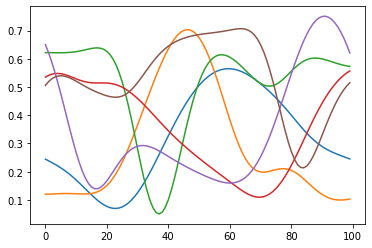

In [31]:
plt.plot(X_train_norm[2089,:])

In [32]:
# Convert to Tensor 
# do not store on GPU (yet)
X_train = torch.from_numpy(X_train_norm).to(torch.float64)
Y_train = torch.from_numpy(Y_train_norm).to(torch.float64)

# X_val = torch.from_numpy(X_val_norm).float()

# X_val_resized = np.expand_dims(Y_val_norm[:,0,:], axis=1)
# Y_val = torch.from_numpy(X_val_resized).float()

X_val = torch.from_numpy(X_val_norm).to(torch.float64)
Y_val = torch.from_numpy(Y_val_norm).to(torch.float64)


X_val_lt = torch.from_numpy(X_val_lt_norm).to(torch.float64)
Y_val_lt = torch.from_numpy(Y_val_lt_norm).to(torch.float64)


print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')

print(f'X_val shape: {X_val.shape}')
print(f'Y_val shape: {Y_val.shape}')

print(f'X_val_lt shape: {X_val_lt.shape}') #long term predictions
print(f'Y_val_lt shape: {Y_val_lt.shape}') #long term predictions




X_train shape: torch.Size([40589, 100, 6])
Y_train shape: torch.Size([40589, 1, 6])
X_val shape: torch.Size([5169, 100, 6])
Y_val shape: torch.Size([5169, 1, 6])
X_val_lt shape: torch.Size([2179, 100, 6])
Y_val_lt shape: torch.Size([2179, 200, 6])


In [33]:
X_val.dtype

torch.float64

In [34]:
train_dataset = gaitDataset(X_train, Y_train)
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle = True)
# train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle = True)

val_dataset = gaitDataset(X_val, Y_val) #ADJUSTED
val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=True)
# val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)


# val_lt_dataset = gaitDataset(X_val_lt, Y_val_lt) #long term predictions
# val_lt_dataloader = DataLoader(val_lt_dataset, batch_size=len(val_lt_dataset), shuffle=False)

val_lt_dataset = gaitDataset(X_val_lt[:300,:,:], Y_val_lt[:300,:,:]) #long term predictions
val_lt_dataloader = DataLoader(val_lt_dataset, batch_size=len(val_lt_dataset), shuffle=False)


print(f"Train Dataset length: {len(train_dataset)}")
print(f"Val Dataset length: {len(val_dataset)}")
print(f"Val_lt Dataset length: {len(val_lt_dataset)}")


Train Dataset length: 40589
Val Dataset length: 5169
Val_lt Dataset length: 300


In [35]:
len(train_dataloader)

318

#### Sanity check

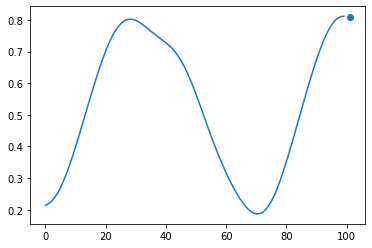

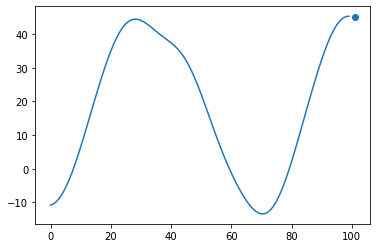

In [129]:
x1 = np.arange(0,100)
x2 = 101
x3 = np.arange(101,301)
eg = 800
norm_X= X_val[eg,:,0].cpu().numpy()
norm_Y = Y_val[eg,:,0].cpu().numpy() 

denorm_X_all = denormalise(X_val, scalars)
denorm_Y_all = denormalise(Y_val, scalars)

denorm_X = denorm_X_all[eg,:,0]
denorm_Y = denorm_Y_all[eg,:,0]

plt.plot(x1, norm_X)
plt.scatter(x2, norm_Y)
plt.show()
plt.plot(x1, denorm_X)
plt.scatter(x2, denorm_Y)

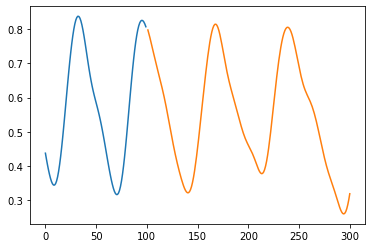

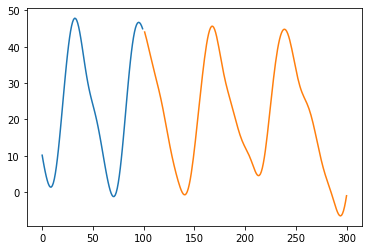

In [135]:
x1 = np.arange(0,100)
x2 = 101
x3 = np.arange(101,301)
eg = 1000
norm_X= X_val_lt[eg,:,0].cpu().numpy()
norm_Y = Y_val_lt[eg,:,0].cpu().numpy() 

denorm_X_all = denormalise(X_val_lt, scalars)
denorm_Y_all = denormalise(Y_val_lt, scalars)

denorm_X = denorm_X_all[eg,:,0]
denorm_Y = denorm_Y_all[eg,:,0]

plt.plot(x1, norm_X)
plt.plot(x3, norm_Y)
plt.show()
plt.plot(x1, denorm_X)
plt.plot(x3, denorm_Y)

### Model training


#### Another tutorial:
https://www.kaggle.com/code/seangribben/lstm-time-series-prediction-pytorch-sine-wave

In [136]:
print(f'shape of X_train: {X_train.shape}, shape of Y_train: {Y_train.shape}')

shape of X_train: torch.Size([40589, 100, 6]), shape of Y_train: torch.Size([40589, 1, 6])


In [37]:
# train_dataset = gaitDataset(X_train, Y_train)
# train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle = True)
# # train_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle = False)

# val_dataset = gaitDataset(X_val, Y_val) #ADJUSTED
# # val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False)
# val_dataloader = DataLoader(val_dataset, batch_size=256, shuffle=True)

In [38]:
look_back = 100

In [39]:
# train_dataset.shape
# train_labels.shape

In [40]:
# #Vanilla LSTM
# class Net(nn.Module):
#     def __init__(self, n_neurons, input_shape):
#         super(Net, self).__init__()
        
#         # self.fc1 = nn.Linear(input_shape, n_neurons)
#         self.lstm = nn.LSTM(input_size=input_shape, hidden_size=n_neurons)
#         self.fc = nn.Linear(n_neurons, 1)
    
#     def forward(self, x):
#         out, _ = self.lstm(x)
#         # out = self.fc1(x)
#         out = self.fc(out)
#         return out

In [41]:
# # Vanilla LSTM
# class LSTM(nn.Module):
#     def __init__(self, n_neurons, input_shape):
#         super(LSTM, self).__init__()
        
#         self.lstm = nn.LSTM(input_size=len(features), hidden_size=n_neurons, num_layers=2, batch_first = True)
#         self.fc = nn.Linear(n_neurons, len(features))

#     def forward(self, x):
#         # print(f'input shape: {x.shape}')
#         out, _ = self.lstm(x)

#         out = self.fc(out[:,-1])

#         return out.unsqueeze(1)

In [42]:
# # MLP
# class Net(nn.Module):
#     def __init__(self, n_neurons, input_shape):
#         super(Net, self).__init__()
#         self.flatten = nn.Flatten(start_dim=1, end_dim=-1)
#         self.fc1 = nn.Linear(input_shape, n_neurons)
#         self.fc = nn.Linear(n_neurons, 1)
#         # self.relu = nn.ReLU()
#     def forward(self, x):
#         # print(f'input: {x.shape}')
#         out = self.flatten(x)
#         # print(f'flatten output: {out.shape}')
#         out = self.fc1(out)
#         # out = self.relu(out)
#         # print(f'fc1 shape: {out.shape}')
#         out = self.fc(out)
#         # print(f'output.shape {out.shape}')
#         return out.unsqueeze(1)

In [43]:
# # MLP
# class MLP(nn.Module):
#     def __init__(self, n_neurons, input_shape):
#         super(MLP, self).__init__()

#         self.flatten = nn.Flatten(1,-1)
#         self.fc1 = nn.Linear(input_shape*len(features), n_neurons)
#         self.fc = nn.Linear(n_neurons, len(features))
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         # print(f'input: {x.shape}')
#         out = self.flatten(x)
#         # print(f'flatten output: {out.shape}')
#         out = self.fc1(out)
#         out = self.relu(out)
#         # print(f'fc1 shape: {out.shape}')
#         out = self.fc(out)
#         # print(f'output.shape {out.shape}')
#         return out.unsqueeze(1)

In [44]:
# # MLP
# class MLP(nn.Module):
#     def __init__(self, n_neurons, input_shape):
#         super(MLP, self).__init__()
        
#         self.fc1 = nn.Linear(input_shape, n_neurons)
#         self.fc2 = nn.Linear(n_neurons, n_neurons)

#         self.fc3 = nn.Linear(n_neurons, n_neurons)
 
#         # self.fc1 = nn.Linear(n_neurons, n_neurons)

#         # self.lstm = nn.LSTM(input_size=input_shape, hidden_size=n_neurons)
#         self.fc = nn.Linear(n_neurons, 1)
#         self.relu = nn.ReLU()
    
#     def forward(self, x):
#         # print(f'input shape: {x.permute(2,0,1).shape}')
#         # out, _ = self.lstm(x)
#         out = self.fc1(x.permute(2,0,1))
#         out = self.relu(out)

#         out = self.fc2(out)
#         out = self.relu(out)
        
#         out = self.fc3(out)
#         out = self.relu(out)

#         # print(f'lstm out shape: {out.shape}')
#         out = self.fc(out)
#         # print(f'output.shape {out.permute(1,0,2).shape}')
#         return out.permute(1,2,0)

In [45]:
# import math 
# class PositionalEncoding(nn.Module):

#     def __init__(self, d_model, max_len=1000):
#         super(PositionalEncoding, self).__init__()       
#         pe = torch.zeros(max_len, d_model)
#         position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
#         div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
#         pe[:, 0::2] = torch.sin(position * div_term)
#         pe[:, 1::2] = torch.cos(position * div_term)
#         pe = pe.unsqueeze(0).transpose(0, 1).to(DEVICE) #pe should be size [1, max_len,d_model] after transpose it will be [max_len, 1, d_model]
#         #pe.requires_grad = False
#         self.register_buffer('pe', pe) 

#     def forward(self, x):
#         a = x + self.pe[:x.size(0), :]
#         return a.to(DEVICE)
       

In [46]:
#source: https://github.com/QData/spacetimeformer/blob/20ab0b572b6f087964aad8d9f89a886b736bf432/spacetimeformer/time2vec.py 
import torch
from torch import nn

class Time2Vec(nn.Module):
    def __init__(self, input_dim=len(features), embed_dim=512, act_function=torch.sin):
        assert embed_dim % input_dim == 0
        super(Time2Vec, self).__init__()
        self.enabled = embed_dim > 0
        if self.enabled:
            self.embed_dim = embed_dim // input_dim
            self.input_dim = input_dim
            self.embed_weight = nn.parameter.Parameter(
                torch.randn(self.input_dim, self.embed_dim)
            )
            self.embed_bias = nn.parameter.Parameter(
                torch.randn(self.input_dim, self.embed_dim)
            )
            self.act_function = act_function

    def forward(self, x):
        if self.enabled:
            x = torch.diag_embed(x)
            # x.shape = (bs, sequence_length, input_dim, input_dim)
            x_affine = torch.matmul(x, self.embed_weight) + self.embed_bias
            # x_affine.shape = (bs, sequence_length, input_dim, time_embed_dim)
            x_affine_0, x_affine_remain = torch.split(
                x_affine, [1, self.embed_dim - 1], dim=-1
            )
            x_affine_remain = self.act_function(x_affine_remain)
            x_output = torch.cat([x_affine_0, x_affine_remain], dim=-1)
            x_output = x_output.view(x_output.size(0), x_output.size(1), -1)
            # x_output.shape = (bs, sequence_length, input_dim * time_embed_dim)
        else:
            x_output = x
        return x_output

In [47]:
#source: https://pytorch.org/tutorials/beginner/transformer_tutorial.html
import math 
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 300):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)
        
        #shape [max_len,1]
        position = torch.arange(max_len).unsqueeze(1)

        # (-math.log(10000.0) / d_model) makes everything negative, while exp them makes everything positive but very small value that with power of -1, -2, -3 etc.
        # shape [d_model/2]
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))

        #shape [1, max_len, d_model]
        pe = torch.zeros(1, max_len, d_model)
        pe[0, :, 0::2] = torch.sin(position * div_term)
        pe[0, :, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        Args:
            x: Tensor, shape [batch_size, seq_len, embedding_dim]
        """
        x = x + self.pe[:,:x.size(1)]
        return self.dropout(x)

In [51]:
class Transformer(nn.Module):
    def __init__(self,feature_size,num_layers,dropout=0.1):
        super(Transformer, self).__init__()

        # self.device = device
        self.feature_size = feature_size
        # self.out_seq_len = 6
        self.d_model= 6


        # self.t2v = Time2Vec(input_dim=len(features), embed_dim=self.d_model, act_function=torch.sin).to(DEVICE)
        self.pe = PositionalEncoding(d_model = self.d_model, dropout = 0.1).to(DEVICE)
        self.transformer = nn.Transformer(d_model=self.d_model, nhead = 6, num_encoder_layers=5, num_decoder_layers=2, dim_feedforward=100, dropout=0.1, batch_first=True)
        self.linear = nn.Linear(6 ,len(features))
        # self.tanh = nn.Tanh()


    def forward(self,x):
        # print(f'input shape: {x.shape}')

        src = self.pe(x)
        # print(f'after positional encoding: {out.shape}')

        # tgt = self.pe(x[:,:-1,:])
        tgt = self.pe(x[:,-2,:].unsqueeze(1))

        out = self.transformer(src, tgt)
        # output of decoder shape: torch.Size([batch_size, 99, input_embed])
        # print(f'output of transfoermer: {out.shape}')
        
        out = out.reshape(out.shape[0], -1)
        # print(f'reshaped transfoer out: {out.shape}')

        out = self.linear(out)
        out = out.reshape(x.shape[0], 1, self.feature_size)
        # print(f'output of decoder shape: {out.shape}')

        
        return out

In [52]:
# DEVICE = 'cpu'
DEVICE = 'cuda'

  0%|          | 0/50 [00:00<?, ?it/s]

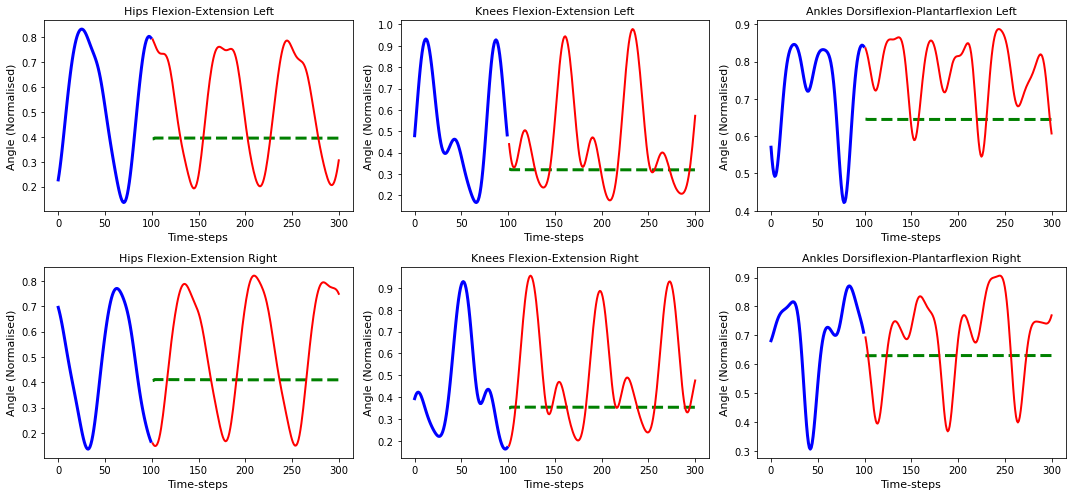

Epoch: 1, Train Loss: 0.06463173502387638, Val Loss: 0.05498716228523753, lt Loss: 0.05421562441935746
Epoch: 2, Train Loss: 0.029877470165220677, Val Loss: 0.04386639207480441, lt Loss: 0.06850439763457772
Epoch: 3, Train Loss: 0.021220207436603876, Val Loss: 0.027772975590247946, lt Loss: 0.09094295175049766
Epoch: 4, Train Loss: 0.013191392715651826, Val Loss: 0.022385961042556114, lt Loss: 0.099038123028995
Epoch: 5, Train Loss: 0.010317943543331463, Val Loss: 0.02033964646589405, lt Loss: 0.09834098968105177


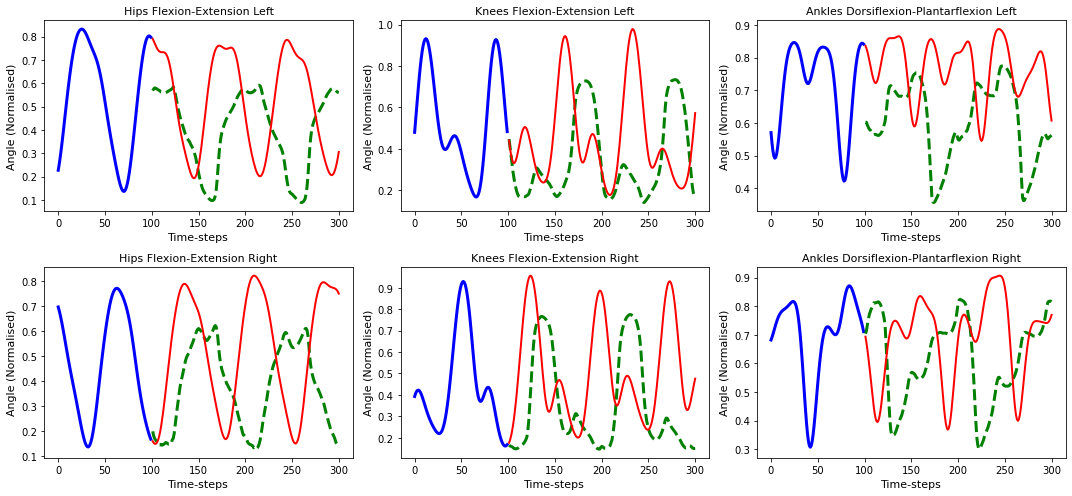

Epoch: 6, Train Loss: 0.008939614776611815, Val Loss: 0.019780797182797297, lt Loss: 0.09627282989172352
Epoch: 7, Train Loss: 0.008010580864438954, Val Loss: 0.018765614561614893, lt Loss: 0.09134507397478847
Epoch: 8, Train Loss: 0.00734366072814616, Val Loss: 0.017694277871458365, lt Loss: 0.09013907260399444
Epoch: 9, Train Loss: 0.006762502611493526, Val Loss: 0.015336254667864705, lt Loss: 0.09314963349909208
Epoch: 10, Train Loss: 0.006244339376663331, Val Loss: 0.013646058911096983, lt Loss: 0.07903298139478447


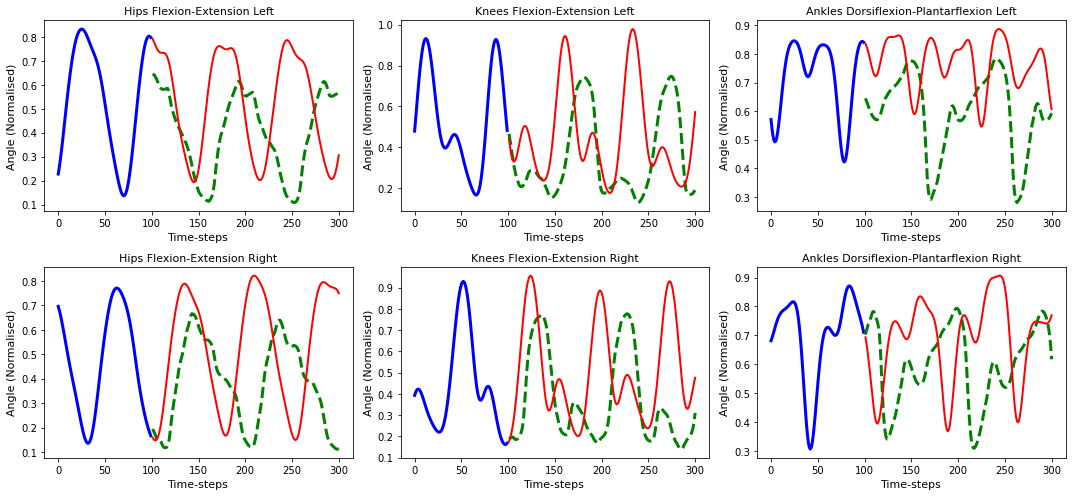

Epoch: 11, Train Loss: 0.005818970940337428, Val Loss: 0.013450113900914445, lt Loss: 0.08220648668904351
Epoch: 12, Train Loss: 0.00549811771875947, Val Loss: 0.012524241969150609, lt Loss: 0.0802827977800524
Epoch: 13, Train Loss: 0.005226866413658803, Val Loss: 0.013403661576477597, lt Loss: 0.06848358623341386
Epoch: 14, Train Loss: 0.00506682129185, Val Loss: 0.011648721250745772, lt Loss: 0.06336180630559887
Epoch: 15, Train Loss: 0.0048119871199810834, Val Loss: 0.010779894650237525, lt Loss: 0.06859229079816839


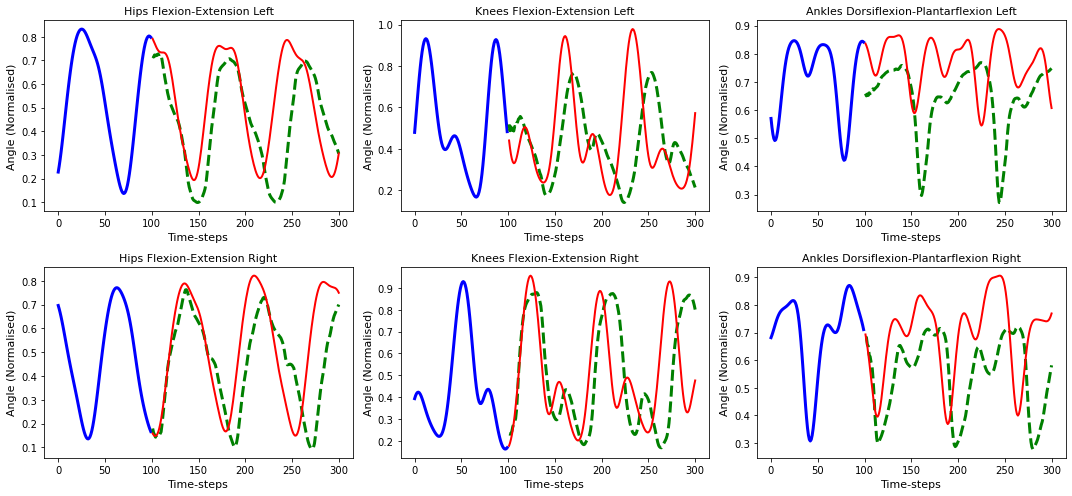

Epoch: 16, Train Loss: 0.0046832017069895465, Val Loss: 0.01166200852866333, lt Loss: 0.05632556890982116
Epoch: 17, Train Loss: 0.004564286518042132, Val Loss: 0.011265427218943079, lt Loss: 0.0792382594651861
Epoch: 18, Train Loss: 0.004431569445884532, Val Loss: 0.010715166681743946, lt Loss: 0.07042236519266351
Epoch: 19, Train Loss: 0.004346167504873369, Val Loss: 0.010957723870428985, lt Loss: 0.08440760002294463
Epoch: 20, Train Loss: 0.004238765487295908, Val Loss: 0.009622098141508625, lt Loss: 0.07571601399331436


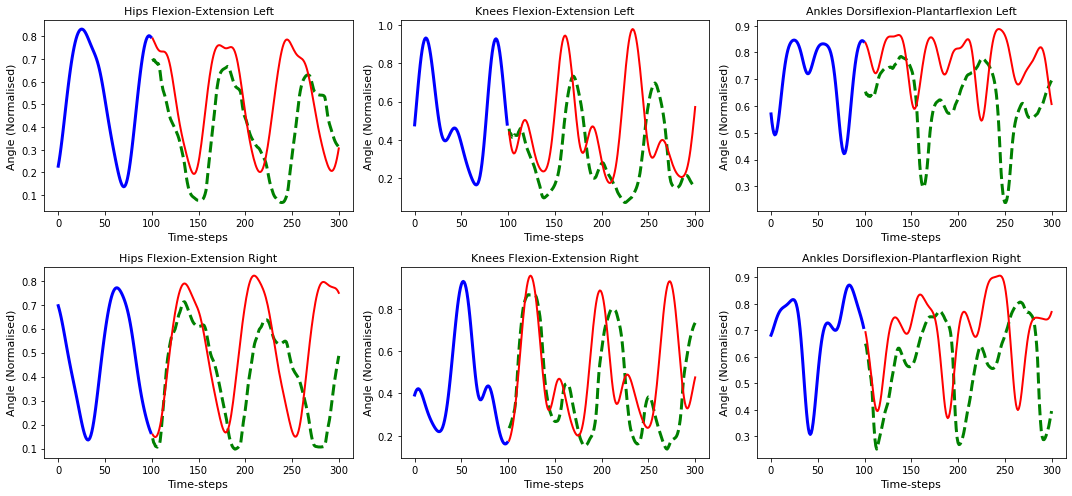

Epoch: 21, Train Loss: 0.004153158072280684, Val Loss: 0.009973832500263435, lt Loss: 0.08193582240997571
Epoch: 22, Train Loss: 0.0040586714305885134, Val Loss: 0.00923649014812323, lt Loss: 0.05594835686615676
Epoch: 23, Train Loss: 0.004022391196622087, Val Loss: 0.010143073855923307, lt Loss: 0.05264091258400607
Epoch: 24, Train Loss: 0.003961648605641099, Val Loss: 0.00941706056441924, lt Loss: 0.05206449853000708
Epoch: 25, Train Loss: 0.003880792237533744, Val Loss: 0.010303488668706923, lt Loss: 0.05635324754794128


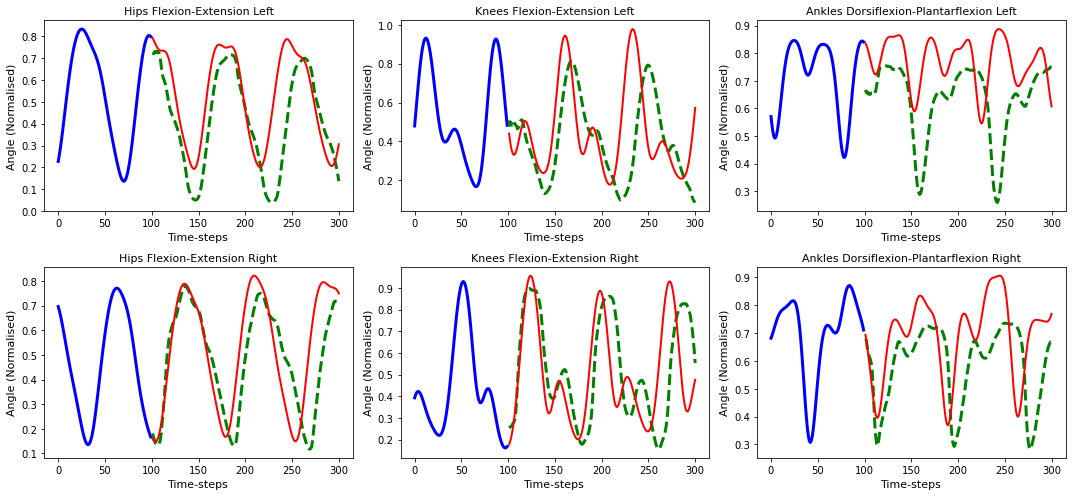

Epoch: 26, Train Loss: 0.0038317455515517315, Val Loss: 0.009119268940884615, lt Loss: 0.06209741312772948
Epoch: 27, Train Loss: 0.00381364584999766, Val Loss: 0.009966079359303536, lt Loss: 0.06457219137430924
Epoch: 28, Train Loss: 0.0037069521691933233, Val Loss: 0.009134492975324532, lt Loss: 0.04149270705185539
Epoch: 29, Train Loss: 0.003676961977394132, Val Loss: 0.009391028834782133, lt Loss: 0.05173136322066955
Epoch: 30, Train Loss: 0.003636167538594668, Val Loss: 0.009191508397995181, lt Loss: 0.05951075459791943


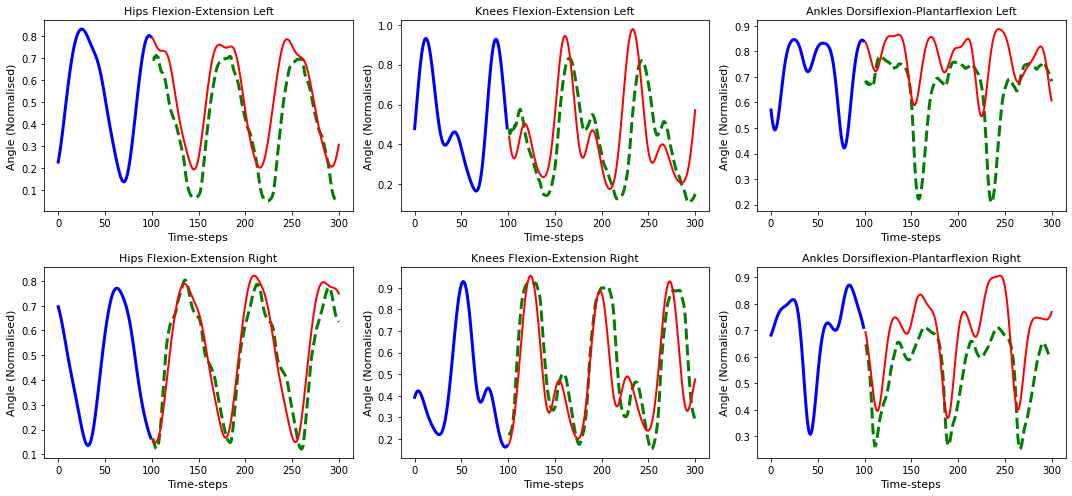

Epoch: 31, Train Loss: 0.0035892807558224886, Val Loss: 0.008939114486925845, lt Loss: 0.03185394052093971
Epoch: 32, Train Loss: 0.0035589397310177937, Val Loss: 0.009392381122322033, lt Loss: 0.07018572479584378
Epoch: 33, Train Loss: 0.0034986491457410195, Val Loss: 0.009123980490448654, lt Loss: 0.07350061468960341
Epoch: 34, Train Loss: 0.003465480310033519, Val Loss: 0.008821289026009973, lt Loss: 0.06784191742492367
Epoch: 35, Train Loss: 0.003424466897245679, Val Loss: 0.008804953430959042, lt Loss: 0.06768558973723776


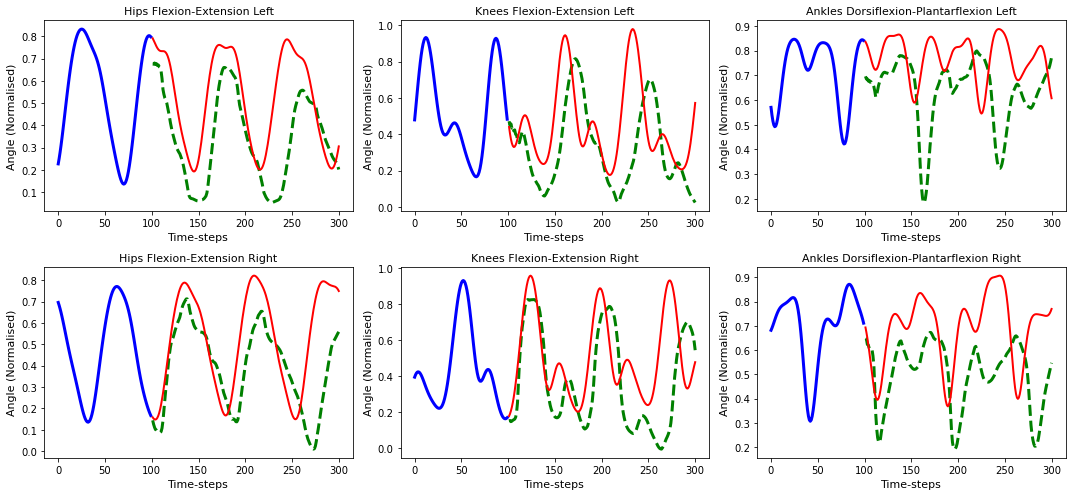

Epoch: 36, Train Loss: 0.0034164329138654443, Val Loss: 0.008667105465458359, lt Loss: 0.07268137226294856
Epoch: 37, Train Loss: 0.0033698861505474693, Val Loss: 0.008091161512904612, lt Loss: 0.06851385311103383
Epoch: 38, Train Loss: 0.00335854640679219, Val Loss: 0.008281150163094636, lt Loss: 0.09613785739465672
Epoch: 39, Train Loss: 0.0033252505320860784, Val Loss: 0.008378357167013944, lt Loss: 0.07767942694364621
Epoch: 40, Train Loss: 0.0032550758418928953, Val Loss: 0.00814262373070961, lt Loss: 0.0911599309827106


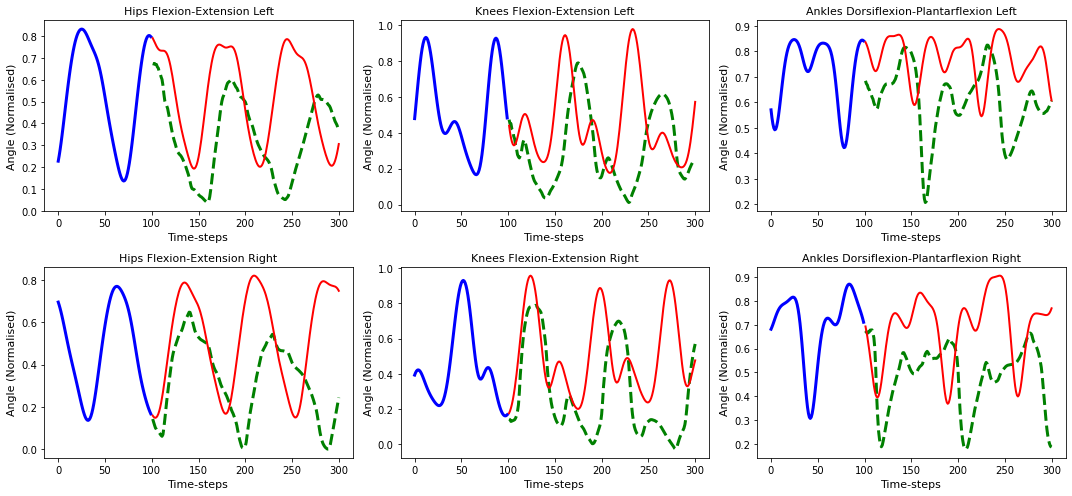

Epoch: 41, Train Loss: 0.0032503346724266197, Val Loss: 0.009432963192738184, lt Loss: 0.09016632144070132
Epoch: 42, Train Loss: 0.0032200393259785667, Val Loss: 0.007632828227024049, lt Loss: 0.08136263922792543
Epoch: 43, Train Loss: 0.0031877220656137983, Val Loss: 0.008144840928076354, lt Loss: 0.07111163388089721
Epoch: 44, Train Loss: 0.0031822669166587545, Val Loss: 0.008967650777867216, lt Loss: 0.10829987710022478
Epoch: 45, Train Loss: 0.003158542089621356, Val Loss: 0.008222290071169258, lt Loss: 0.09568885899936731


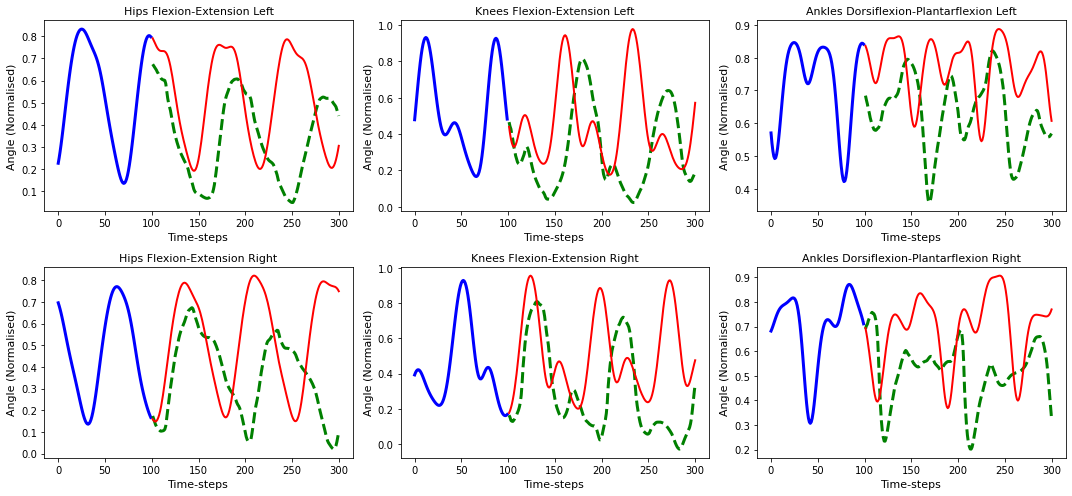

Epoch: 46, Train Loss: 0.003154098776777811, Val Loss: 0.008013594495293064, lt Loss: 0.08513864103014446
Epoch: 47, Train Loss: 0.0031416336085628733, Val Loss: 0.007993279571377182, lt Loss: 0.08628684768708579
Epoch: 48, Train Loss: 0.003112531297280408, Val Loss: 0.008338588051737875, lt Loss: 0.08773856836281906
Epoch: 49, Train Loss: 0.0030728029169823923, Val Loss: 0.0088924951989384, lt Loss: 0.1013445119015875
Epoch: 50, Train Loss: 0.0030769303082512464, Val Loss: 0.008328390050952572, lt Loss: 0.08374068905701355


In [53]:
n_neurons = 10

# model = LSTM(n_neurons, look_back).double().to(DEVICE)
model = Transformer(feature_size=len(features),num_layers=1,dropout=0.1).double().to(DEVICE)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_loss = []
val_loss = []
lt_loss = []

for epoch in tqdm(range(50)):
    train_loss_total = 0.
    i = 0
    model.train()
    for idx, (batch_inputs, batch_targets) in enumerate(train_dataloader):
        i += 1
        model.zero_grad()
        # print(f'train_labels shape: {batch_inputs.shape}')

        batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)
        
        # print(f'batch_inputs.shape {batch_inputs.shape}')
        predictions = model(batch_inputs)
        # print(f'predictions.shape {predictions.shape}')
        # print(f'train_labels shape: {batch_targets.shape}')
        loss = loss_function(predictions, batch_targets)

        train_loss_total += loss.item()
        loss.backward()
        optimizer.step()
    # print(f'len(dataloader): {len(train_dataloader)}')
    train_loss_total = train_loss_total/len(train_dataloader)
    train_loss.append(train_loss_total)

    # Calculate validation loss
    model.eval()
    with torch.no_grad():
        val_loss_total = 0.
        for idx, (batch_inputs, batch_targets) in enumerate(val_dataloader):
            

            batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)
            predictions = model(batch_inputs)
            # print(f'train_labels shape: {train_labels.shape}')
            loss = loss_function(predictions, batch_targets)
            val_loss_total += loss.item()
    
    val_loss_total = val_loss_total/len(val_dataloader)
    val_loss.append(val_loss_total)

    # Calculating long term loss
    model.eval()
    with torch.no_grad():
        lt_loss_total = 0.

        for idx, (batch_inputs, batch_targets) in enumerate(val_lt_dataloader):

            extrapolation = torch.zeros((batch_inputs.shape[0], 200, len(features))).to(DEVICE)
            # print(f'extrapolation.shape: {extrapolation.shape}')

            batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)
            current_inputs = batch_inputs
            for i in range(200):
                # print(f'current_inputs.shape {current_inputs.shape}')
                predictions = model(current_inputs)
                # print(f'predictions.shape {predictions.shape}')

                extrapolation[:,i,:] = predictions.squeeze(1)
                # print(f'current_inputs[:,1:,:].shape {current_inputs[:,1:,:].shape}')
                # print(f'predictions.shape {predictions.shape}')

                #concat shape [batch_size, 99, len(features)] and [batch_size, 1, len(features)]
                current_inputs = torch.cat((current_inputs[:,1:,:], predictions), axis=1)

            loss = loss_function(extrapolation, batch_targets)
       
            lt_loss_total += loss.item()
    
    lt_loss_total = lt_loss_total/len(val_lt_dataloader)
    lt_loss.append(lt_loss_total)

    #plot one sample of extraplation 

    if epoch % 5 == 0:
        x1 = np.arange(0,100)
        x3 = np.arange(101,301)

        fig, axs = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(15,7))
        n = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]] #indicies for the plots

        text_size = 11
        for f in range(len(features)):
            axs[n[f][0],n[f][1]].plot(x1, batch_inputs[200,:,f].cpu().numpy().reshape(-1,1).squeeze(), lw=3, c='b', label='input')
            axs[n[f][0],n[f][1]].plot(x3, extrapolation[200,:,f].cpu().numpy().reshape(-1,1).squeeze(), lw=3, linestyle='dashed', c='g', label='extrapolation')
            axs[n[f][0],n[f][1]].plot(x3, batch_targets[200,:,f].cpu().numpy().reshape(-1,1).squeeze(), lw=2, c='r', label='actual')
            axs[n[f][0],n[f][1]].set_xlabel('Time-steps', size=text_size)
            axs[n[f][0],n[f][1]].set_ylabel('Angle (Normalised)', size=text_size)
            axs[n[f][0],n[f][1]].set_title(features[f], size=text_size)

        plt.show()

    print(f'Epoch: {epoch+1}, Train Loss: {train_loss_total}, Val Loss: {val_loss_total}, lt Loss: {lt_loss_total}')


        

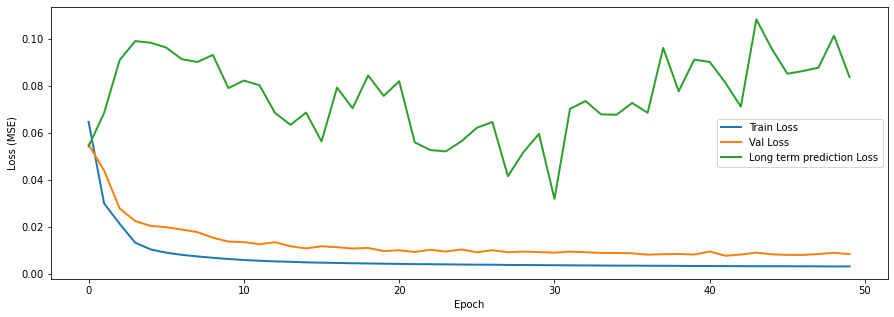

In [54]:

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(train_loss[:], lw=2, label='Train Loss')
ax.plot(val_loss[:], lw=2, label='Val Loss')
ax.plot(lt_loss[:], lw=2, label='Long term prediction Loss')

ax.set_xlabel("Epoch")
ax.set_ylabel("Loss (MSE)")
ax.legend()
plt.show()

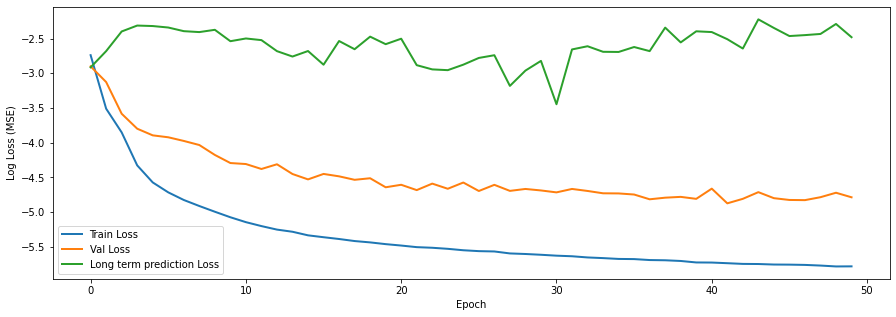

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(np.log(train_loss[:]), lw=2, label='Train Loss')
ax.plot(np.log(val_loss[:]), lw=2, label='Val Loss')
ax.plot(np.log(lt_loss[:]), lw=2, label='Long term prediction Loss')

ax.set_xlabel("Epoch")
ax.set_ylabel("Log Loss (MSE)")
ax.legend()
plt.show()

In [137]:
val_lt_dataset = X_val_lt.to(DEVICE)
model.eval()
with torch.no_grad():
    val_lt_predictions = model(val_lt_dataset)

val_lt_predictions.shape

torch.Size([2179, 1, 6])

In [138]:
#Single Joint Plot
# x1 = np.arange(0,100)
# x2 = 101
# s = 200

# fig, ax = plt.subplots(1,1,figsize=(15,5))

# plt.plot(x1, test_dataset[s,:,0].cpu().numpy().reshape(-1,1).squeeze(), lw=3, c='b', label = 'input')
# plt.scatter(x2, test_predictions[s,:,0].cpu().numpy(), lw=6, c='g', label='prediction')

# plt.xlabel('Time-steps')
# plt.ylabel('Angle (normalised)')
# ax.legend(loc='lower left')
# plt.show()

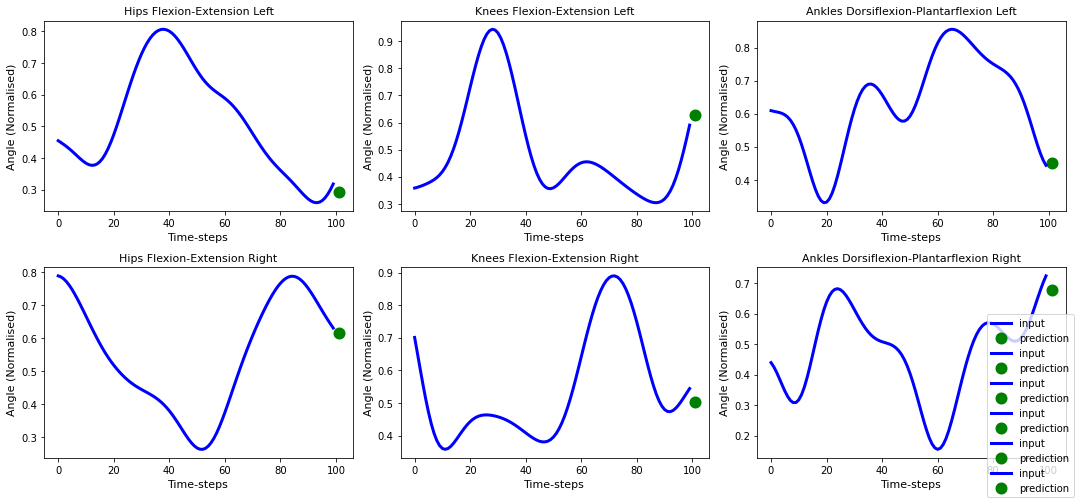

In [148]:
x1 = np.arange(0,100)
x2 = 101
s = 1200

fig, axs = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(15,7))
n = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]] #indicies for the plots

text_size = 11

for f in range(len(features)):
    axs[n[f][0],n[f][1]].plot(x1, val_lt_dataset[s,:,f].cpu().numpy().reshape(-1,1).squeeze(), lw=3, c='b', label = 'input')
    axs[n[f][0],n[f][1]].scatter(x2, val_lt_predictions[s,:,f].cpu().numpy(), lw=6, c='g', label='prediction')
    axs[n[f][0],n[f][1]].set_xlabel('Time-steps', size=text_size)
    axs[n[f][0],n[f][1]].set_ylabel('Angle (Normalised)', size=text_size)
    axs[n[f][0],n[f][1]].set_title(features[f], size=text_size)

# axLine, axLabel = ax.get_legend_handles_labels()
fig.legend(loc = 'lower right')

In [152]:
val_lt_extrapolation = torch.zeros((1,200, len(features))).to(DEVICE)
sample_input = val_lt_dataset[s,:,:].unsqueeze(0).to(DEVICE)
current_batch = sample_input
with torch.no_grad():
    for i in range(200):
        predicted_value = model(current_batch)
        val_lt_extrapolation[:,i,:] = predicted_value
        current_batch = torch.cat((current_batch[:,1:,:], predicted_value), axis=1)

sample_input.shape

torch.Size([1, 100, 6])

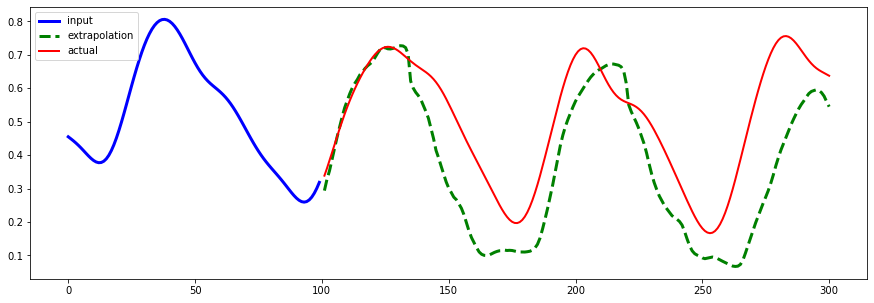

In [153]:
x1 = np.arange(0,100)
x2 = 101
x3 = np.arange(101,301)

fig, ax = plt.subplots(1,1,figsize=(15,5))
plt.plot(x1, sample_input[:,:,0].cpu().numpy().reshape(-1,1).squeeze(), lw=3, c='b', label='input')
plt.plot(x3, val_lt_extrapolation[:,:,0].cpu().numpy().reshape(-1,1).squeeze(), lw=3, linestyle='dashed', c='g', label='extrapolation')
plt.plot(x3, Y_val_lt[s,:,0].cpu().numpy().reshape(-1,1).squeeze(), lw=2, c='r', label='actual')
plt.legend()

sample: 1200


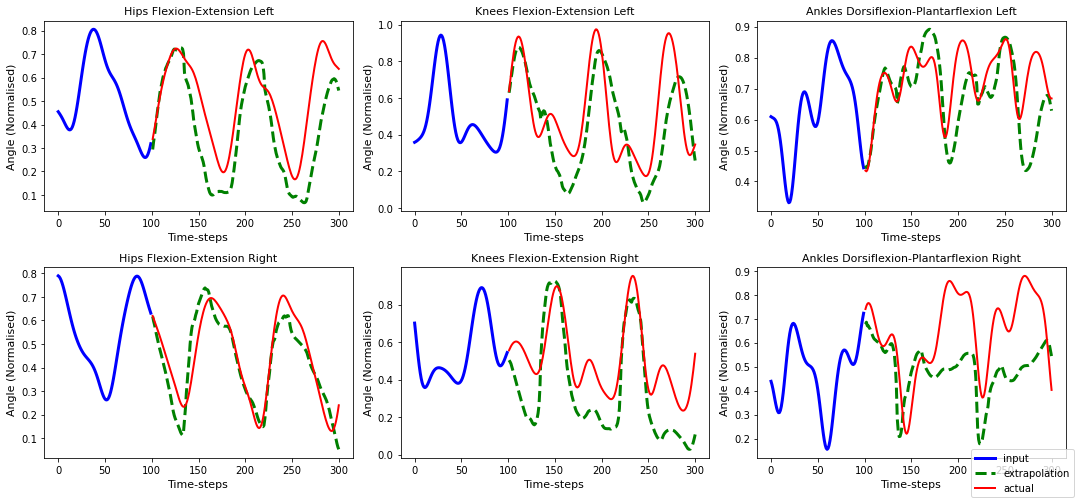

In [154]:
x1 = np.arange(0,100)
x2 = 101
x3 = np.arange(101,301)

fig, axs = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(15,7))
n = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]] #indicies for the plots

text_size = 11
for f in range(len(features)):
    axs[n[f][0],n[f][1]].plot(x1, sample_input[:,:,f].cpu().numpy().reshape(-1,1).squeeze(), lw=3, c='b', label='input')
    axs[n[f][0],n[f][1]].plot(x3, val_lt_extrapolation[:,:,f].cpu().numpy().reshape(-1,1).squeeze(), lw=3, linestyle='dashed', c='g', label='extrapolation')
    axs[n[f][0],n[f][1]].plot(x3, Y_val_lt[s,:,f].cpu().numpy().reshape(-1,1).squeeze(), lw=2, c='r', label='actual')
    axs[n[f][0],n[f][1]].set_xlabel('Time-steps', size=text_size)
    axs[n[f][0],n[f][1]].set_ylabel('Angle (Normalised)', size=text_size)
    axs[n[f][0],n[f][1]].set_title(features[f], size=text_size)

axLine, axLabel = ax.get_legend_handles_labels()
fig.legend(axLine, axLabel,           
           loc = 'lower right')
           
print(f'sample: {s}')

In [155]:
#plot denormalised 

input = denormalise(sample_input.cpu().numpy(), scalars)
lt_preds = denormalise(val_lt_extrapolation.cpu().numpy(), scalars)
actual = denormalise(Y_val_lt.cpu().numpy(), scalars)
one_pred = denormalise(lt_preds[:,0,:].reshape((lt_preds.shape[0],1,6)), scalars)


sample: 1200


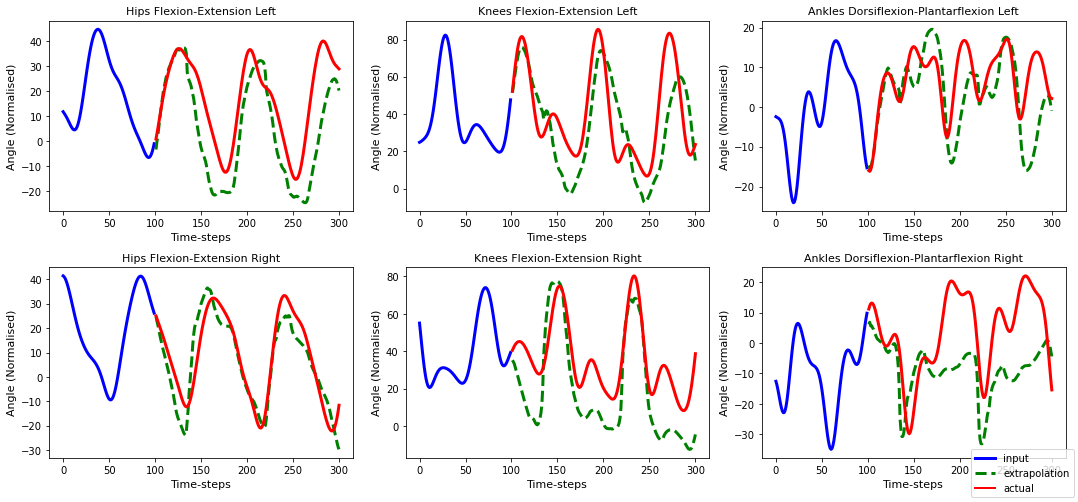

In [157]:
x1 = np.arange(0,100)
x2 = 101
x3 = np.arange(101,301)

fig, axs = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(15,7))
n = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]] #indicies for the plots

text_size = 11
for f in range(len(features)):
    axs[n[f][0],n[f][1]].plot(x1, input[:,:,f].reshape(-1,1).squeeze(), lw=3, c='b', label='input')
    axs[n[f][0],n[f][1]].plot(x3, lt_preds[:,:,f].reshape(-1,1).squeeze(), lw=3, linestyle='dashed', c='g', label='extrapolation')
    axs[n[f][0],n[f][1]].plot(x3, actual[s,:,f].reshape(-1,1).squeeze(), lw=3, c='r', label='actual')
    # axs[n[f][0],n[f][1]].scatter(x2, one_pred[s,:,f].reshape(-1,1).squeeze(), lw=3, c='r', label='single prediction')
    axs[n[f][0],n[f][1]].set_xlabel('Time-steps', size=text_size)
    axs[n[f][0],n[f][1]].set_ylabel('Angle (Normalised)', size=text_size)
    axs[n[f][0],n[f][1]].set_title(features[f], size=text_size)

axLine, axLabel = ax.get_legend_handles_labels()
fig.legend(axLine, axLabel,           
           loc = 'lower right')
           
print(f'sample: {s}')

### Calculating MSE and MAE

In [158]:
print(f'shape of X validation data: {X_val.shape}, Y validation data: {Y_val.shape}')

shape of X validation data: torch.Size([5169, 100, 6]), Y validation data: torch.Size([5169, 1, 6])


In [159]:
# Calculate predictions
val_predictions = X_val[:3000, :, :].to(DEVICE)
model.eval()
with torch.no_grad():
    val_predictions = model(val_predictions)

#Denormalise X_val and Y_val and predictions 
# input_val = denormalise(X_val.cpu().numpy(), scalars)
# actual_val = denormalise(Y_val.cpu().numpy(), scalars)
# preds_val = denormalise(test_predictions.cpu().numpy(), scalars)

input_val = denormalise(X_val.cpu().numpy(), scalars)
actual_val = denormalise(Y_val[:3000,:,:].cpu().numpy(), scalars)
preds_val = denormalise(val_predictions.cpu().numpy(), scalars)

In [77]:
# diff = abs(Y_val.to(DEVICE) - test_predictions)
# plt.hist(diff.cpu().numpy().reshape(-1,1).squeeze(), 60)


In [160]:
# mse = np.mean((actual_val-preds_val) ** 2)
# mae = np.mean(np.abs(actual_val-preds_val))

val_mse_loss, val_mse_std = mse_loss(preds_val, actual_val, reduction='mean', format='np')
val_mae_loss, val_mae_std = mae_loss(preds_val, actual_val, reduction='mean', format='np')

print(f'Val MSE Loss: {val_mse_loss:.5}, Val MSE std: {val_mse_std:.5}')
print(f'Val MAE Loss: {val_mae_loss:.5}, Val MAE std: {val_mae_std:.5}')


Val MSE Loss: 70.235, Val MSE std: 109.21
Val MAE Loss: 6.654, Val MAE std: 5.0951


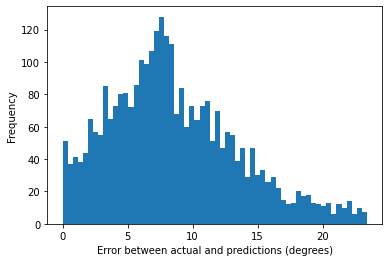

In [161]:
diff = abs(preds_val[:,:,0] -actual_val[:,:,0])
plt.hist(diff.squeeze(), 60)
plt.xlabel('Error between actual and predictions (degrees)')
plt.ylabel('Frequency')
plt.show()

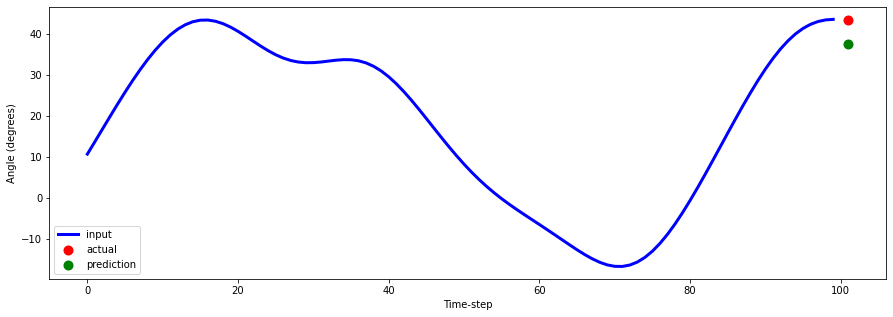

In [162]:
x1 = np.arange(0,100)
x2 = 101
s = 100
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

plt.plot(x1, input_val[s,:,0].reshape(-1,1).squeeze(), lw=3, c='b', label='input')
plt.scatter(x2, actual_val[s,:,0], lw=4, c='r', label='actual')
plt.scatter(x2, preds_val[s,:,0], lw=4, c='g', label='prediction')

plt.xlabel('Time-step')
plt.ylabel('Angle (degrees)')

ax.legend(loc="lower left")
plt.show()

sample: 100


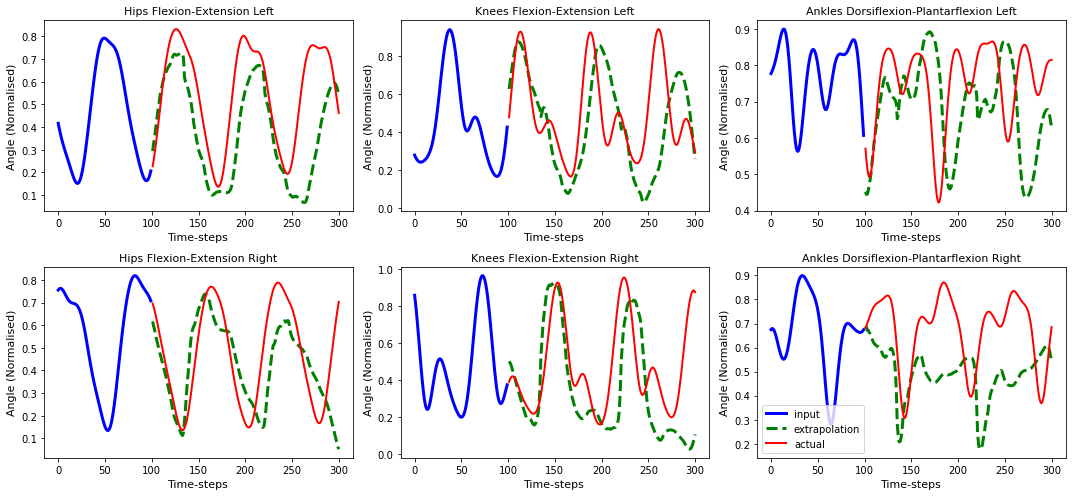

In [178]:
x1 = np.arange(0,100)
x2 = 101
x3 = np.arange(101,301)

fig, axs = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(15,7))
n = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]] #indicies for the plots

text_size = 11
for f in range(len(features)):
    axs[n[f][0],n[f][1]].plot(x1, X_val_lt[s,:,f].cpu().numpy().reshape(-1,1).squeeze(), lw=3, c='b', label='input')
    axs[n[f][0],n[f][1]].plot(x3, val_lt_extrapolation[:,:,f].cpu().numpy().reshape(-1,1).squeeze(), lw=3, linestyle='dashed', c='g', label='extrapolation')
    axs[n[f][0],n[f][1]].plot(x3, Y_val_lt[s,:,f].cpu().numpy().reshape(-1,1).squeeze(), lw=2, c='r', label='actual')
    axs[n[f][0],n[f][1]].set_xlabel('Time-steps', size=text_size)
    axs[n[f][0],n[f][1]].set_ylabel('Angle (Normalised)', size=text_size)
    axs[n[f][0],n[f][1]].set_title(features[f], size=text_size)

plt.legend()
           
print(f'sample: {s}')

In [175]:
seed_batch[:,:,1]

tensor([[0.3588, 0.3616, 0.3650, 0.3689, 0.3732, 0.3779, 0.3833, 0.3897, 0.3975,
         0.4072, 0.4194, 0.4346, 0.4533, 0.4759, 0.5025, 0.5331, 0.5675, 0.6052,
         0.6454, 0.6873, 0.7296, 0.7713, 0.8110, 0.8474, 0.8793, 0.9056, 0.9254,
         0.9380, 0.9429, 0.9401, 0.9294, 0.9113, 0.8862, 0.8549, 0.8184, 0.7775,
         0.7336, 0.6878, 0.6414, 0.5956, 0.5517, 0.5106, 0.4733, 0.4405, 0.4129,
         0.3907, 0.3742, 0.3632, 0.3575, 0.3566, 0.3599, 0.3665, 0.3757, 0.3866,
         0.3984, 0.4102, 0.4215, 0.4317, 0.4403, 0.4471, 0.4519, 0.4547, 0.4555,
         0.4545, 0.4519, 0.4479, 0.4427, 0.4367, 0.4298, 0.4225, 0.4147, 0.4067,
         0.3986, 0.3904, 0.3822, 0.3741, 0.3662, 0.3584, 0.3508, 0.3434, 0.3364,
         0.3296, 0.3232, 0.3174, 0.3123, 0.3083, 0.3057, 0.3049, 0.3065, 0.3109,
         0.3189, 0.3309, 0.3474, 0.3687, 0.3949, 0.4261, 0.4619, 0.5017, 0.5448,
         0.5903]], device='cuda:0', dtype=torch.float64)

In [174]:
sample_input[:,:,1]

tensor([[0.3588, 0.3616, 0.3650, 0.3689, 0.3732, 0.3779, 0.3833, 0.3897, 0.3975,
         0.4072, 0.4194, 0.4346, 0.4533, 0.4759, 0.5025, 0.5331, 0.5675, 0.6052,
         0.6454, 0.6873, 0.7296, 0.7713, 0.8110, 0.8474, 0.8793, 0.9056, 0.9254,
         0.9380, 0.9429, 0.9401, 0.9294, 0.9113, 0.8862, 0.8549, 0.8184, 0.7775,
         0.7336, 0.6878, 0.6414, 0.5956, 0.5517, 0.5106, 0.4733, 0.4405, 0.4129,
         0.3907, 0.3742, 0.3632, 0.3575, 0.3566, 0.3599, 0.3665, 0.3757, 0.3866,
         0.3984, 0.4102, 0.4215, 0.4317, 0.4403, 0.4471, 0.4519, 0.4547, 0.4555,
         0.4545, 0.4519, 0.4479, 0.4427, 0.4367, 0.4298, 0.4225, 0.4147, 0.4067,
         0.3986, 0.3904, 0.3822, 0.3741, 0.3662, 0.3584, 0.3508, 0.3434, 0.3364,
         0.3296, 0.3232, 0.3174, 0.3123, 0.3083, 0.3057, 0.3049, 0.3065, 0.3109,
         0.3189, 0.3309, 0.3474, 0.3687, 0.3949, 0.4261, 0.4619, 0.5017, 0.5448,
         0.5903]], device='cuda:0', dtype=torch.float64)

In [179]:
X_val_lt[s,:,1]

tensor([0.2796, 0.2687, 0.2596, 0.2525, 0.2474, 0.2441, 0.2426, 0.2426, 0.2440,
        0.2465, 0.2500, 0.2543, 0.2596, 0.2659, 0.2735, 0.2826, 0.2937, 0.3072,
        0.3236, 0.3434, 0.3670, 0.3945, 0.4262, 0.4619, 0.5012, 0.5435, 0.5880,
        0.6339, 0.6799, 0.7249, 0.7680, 0.8079, 0.8438, 0.8749, 0.9006, 0.9203,
        0.9337, 0.9406, 0.9408, 0.9344, 0.9213, 0.9017, 0.8760, 0.8445, 0.8079,
        0.7669, 0.7227, 0.6765, 0.6297, 0.5838, 0.5406, 0.5016, 0.4682, 0.4416,
        0.4224, 0.4109, 0.4068, 0.4091, 0.4167, 0.4278, 0.4408, 0.4539, 0.4656,
        0.4745, 0.4797, 0.4807, 0.4773, 0.4697, 0.4581, 0.4432, 0.4255, 0.4059,
        0.3849, 0.3634, 0.3418, 0.3206, 0.3003, 0.2811, 0.2632, 0.2467, 0.2317,
        0.2181, 0.2060, 0.1953, 0.1860, 0.1784, 0.1725, 0.1686, 0.1671, 0.1684,
        0.1731, 0.1816, 0.1944, 0.2120, 0.2348, 0.2629, 0.2966, 0.3355, 0.3794,
        0.4276], dtype=torch.float64)

### Model shape

In [85]:
model.eval()

Transformer(
  (pe): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=6, out_features=6, bias=True)
          )
          (linear1): Linear(in_features=6, out_features=100, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=100, out_features=6, bias=True)
          (norm1): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=6, out_features=6, bias=Tr

### Export Model


In [86]:
fname = 'Exp014_220831_Transformer_encoderDecoder'
path = r'D:\Study 2 Results and Models\Study 2 Experiments\Exp014_220831_Transformer_encoderDecoder' + '\\'  + fname + '.pth'

checkpoint = {'model': model,
          'state_dict': model.state_dict(),
          'optimizer' : optimizer.state_dict()}

torch.save(checkpoint, path)